In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#สร้างข้อมูล
t1 = [0.1*np.random.normal()]
for _ in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())
    #build the time series, just a simple AR(1)
t2 = [item + 0.1*np.random.normal() for item in t1]
t1 = t1[3:]
t2 = t2[:-3]

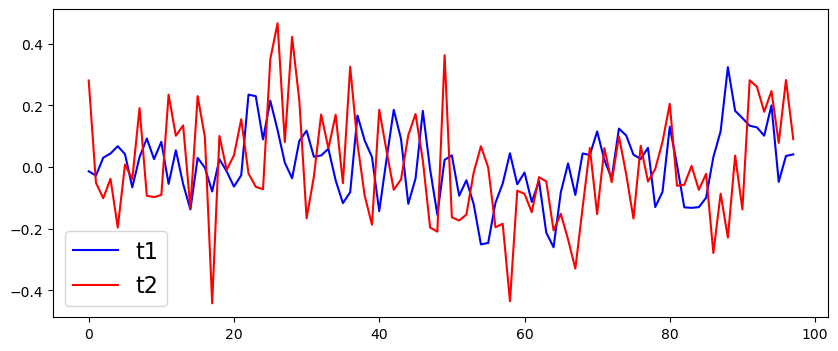

In [3]:
plt.figure(figsize=(10,4))
plt.plot(t1, color='b')
plt.plot(t2, color='r')

plt.legend(['t1', 't2'], fontsize=16)

In [4]:
ts_df = pd.DataFrame(columns=['t2', 't1'], data=zip(t2,t1))

In [5]:
gc_res = grangercausalitytests(ts_df[['t2', 't1']], 3) # number of lag


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2467  , p=0.6206  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=0.2546  , p=0.6139  , df=1
likelihood ratio test: chi2=0.2542  , p=0.6141  , df=1
parameter F test:         F=0.2467  , p=0.6206  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.9030  , p=0.0039  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=12.4548 , p=0.0020  , df=2
likelihood ratio test: chi2=11.7106 , p=0.0029  , df=2
parameter F test:         F=5.9030  , p=0.0039  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=42.8104 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=138.6472, p=0.0000  , df=3
likelihood ratio test: chi2=85.4939 , p=0.0000  , df=3
parameter F test:         F=42.8104 , p=0.0000  , df_denom=88, df_num=3


In [6]:
# p น้อยกว่าระดับนัยสำคัญ แปลว่า t2 lag 3 นั้นส่งผล t1 lag 3 ส่งผลต่อ t2 ในปัจจุบัน